    Date = Date of the order
    Customer_Age = The Age of customer
    Age_Group = Age range for the customer
    Customer_Gender = The customer gender
    Country = The country where the order was made
    State = The state where the order was made
    Product_Category = Product category for each order
    Sub_Category = Product sub category for each order
    Product = The product for each order
    Order_Quantity = Quantity of the product
    Unit_Cost = Cost of inventory holding cost
    Unit_Price = The price of the product
   

### import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [3]:
df=pd.read_csv('Sales.csv')

In [5]:
df.head()

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price
0,11/26/2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
1,11/26/2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120
2,3/23/2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120
3,3/23/2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120
4,5/15/2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120


### Get the information of data

In [5]:
df.shape

(113036, 12)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Customer_Age      113036 non-null  object
 2   Age_Group         113036 non-null  object
 3   Customer_Gender   113036 non-null  object
 4   Country           113036 non-null  object
 5   State             113036 non-null  object
 6   Product_Category  113036 non-null  object
 7   Sub_Category      108676 non-null  object
 8   Product           104478 non-null  object
 9   Order_Quantity    113036 non-null  int64 
 10  Unit_Cost         113036 non-null  int64 
 11  Unit_Price        113036 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 10.3+ MB


In [7]:
df.describe()

,Order_Quantity,Unit_Cost,Unit_Price
count,113036.000000,113036.000000,113036.000000
mean,11.901660,267.296366,452.938267
std,9.561857,549.835483,922.071298
min,1.000000,1.000000,-9.000000
25%,2.000000,2.000000,5.000000
50%,10.000000,9.000000,24.000000
75%,20.000000,42.000000,70.000000
max,32.000000,2171.000000,3578.000000


In [8]:
df.describe(include='object').transpose()

,count,unique,top,freq
Date,113036,1884,3/1/2016,288
Customer_Age,113036,140,29,2540
Age_Group,113036,4,Adults (35-64),55824
Customer_Gender,113036,2,M,58312
Country,113036,6,United States,39206
State,113036,53,California,22450
Product_Category,113036,3,Accessories,70120
Sub_Category,108676,16,Tires and Tubes,33870
Product,104478,131,Water Bottle - 30 oz.,10792


In [9]:
df.dtypes

Date                object
Customer_Age        object
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
dtype: object

In [10]:
df.columns

Index(['Date', 'Customer_Age', 'Age_Group', 'Customer_Gender', 'Country',
       'State', 'Product_Category', 'Sub_Category', 'Product',
       'Order_Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [11]:
df.nunique()

Date                1884
Customer_Age         140
Age_Group              4
Customer_Gender        2
Country                6
State                 53
Product_Category       3
Sub_Category          16
Product              131
Order_Quantity        32
Unit_Cost             34
Unit_Price            37
dtype: int64

In [12]:
df.duplicated().sum()


1000

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

### Univariate Analysis

In [15]:
df['Customer_Age'].unique()

array(['19', '49', '47', '35', '32', '34', '29', '51', '48', '43', '61',
       '57', '38', '52', '24', '23', '26', '54', '46', '41', '33', '42',
       '45', '?', '53', '21', '22', '67', '31', '37', '87', '25', 'x',
       '40', '44', '55', '50', '59', '17', '27', '28', '36', '56', '58',
       '30', '18', '62', '39', '64', '63', '20', '60', '84', '68', '65',
       '73', '69', '66', '75', '76', '78', '71', '72', '82', '86', '77',
       '74', '85', '81', '80', '70', 36, 68, 31, 37, 33, 38, 56, 43, 59,
       51, 50, 46, 40, 35, 41, 45, 47, 23, 27, 29, 30, 32, 34, 24, 25, 49,
       48, 21, 17, 28, 57, 55, 42, 44, 58, 26, 54, 18, 19, 22, 20, 39, 69,
       62, 61, 67, 53, 52, 64, 60, 63, 70, 82, 65, 78, 66, 73, 87, 71, 85,
       81, 84, 86, 75, 74, 77, 72, 80, 79], dtype=object)

In [16]:
df['Age_Group'].value_counts()

Adults (35-64)          55358
Young Adults (25-34)    38299
Youth (<25)             17660
Seniors (64+)             719
Name: Age_Group, dtype: int64

In [17]:
df['Customer_Gender'].value_counts()

M    57813
F    54223
Name: Customer_Gender, dtype: int64

In [18]:
df['Country'].value_counts()

United States     38840
Australia         23736
Canada            14027
United Kingdom    13486
Germany           11027
France            10920
Name: Country, dtype: int64

In [19]:
df['State'].value_counts()

California             22220
British Columbia       13965
England                13486
Washington             11168
New South Wales        10312
Victoria                5973
Oregon                  5246
Queensland              5177
Saarland                2754
Nordrhein-Westfalen     2473
Hessen                  2370
Seine (Paris)           2315
Hamburg                 1816
Seine Saint Denis       1676
Nord                    1655
South Australia         1551
Bayern                  1417
Hauts de Seine          1074
Essonne                  985
Yveline                  943
Tasmania                 723
Seine et Marne           390
Moselle                  384
Loiret                   380
Val d'Oise               264
Garonne (Haute)          207
Brandenburg              197
Val de Marne             157
Charente-Maritime        147
Somme                    133
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

In [20]:
df['Product_Category'].value_counts()

Accessories    69312
Bikes          25794
Clothing       16930
Name: Product_Category, dtype: int64

In [21]:
df['Sub_Category'].value_counts()

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1800
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: Sub_Category, dtype: int64

In [22]:
df['Product'].unique().tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 nan,
 'x',
 '??',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Blue',
 '?',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-200 

<AxesSubplot:xlabel='Order_Quantity', ylabel='Density'>

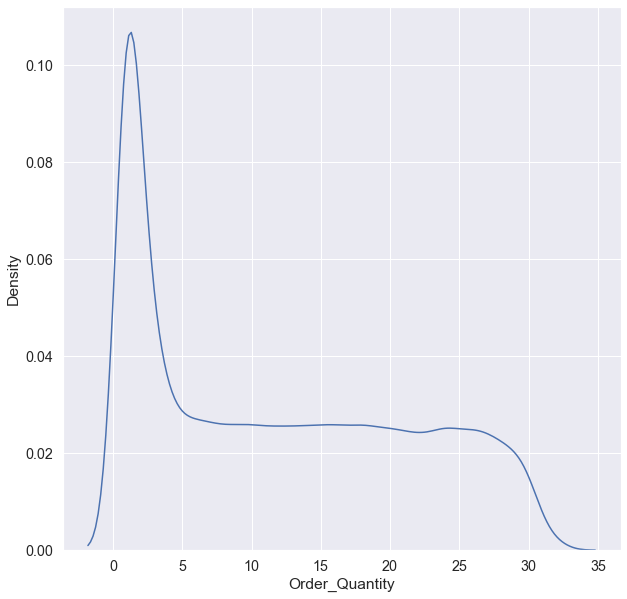

In [23]:
sns.kdeplot(data=df,x='Order_Quantity')

<AxesSubplot:xlabel='Unit_Cost', ylabel='Density'>

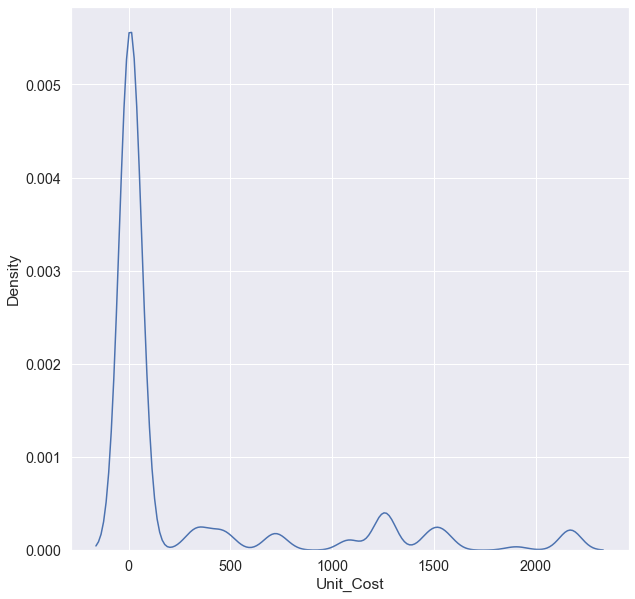

In [24]:
sns.kdeplot(data=df,x='Unit_Cost')

<AxesSubplot:xlabel='Unit_Price', ylabel='Density'>

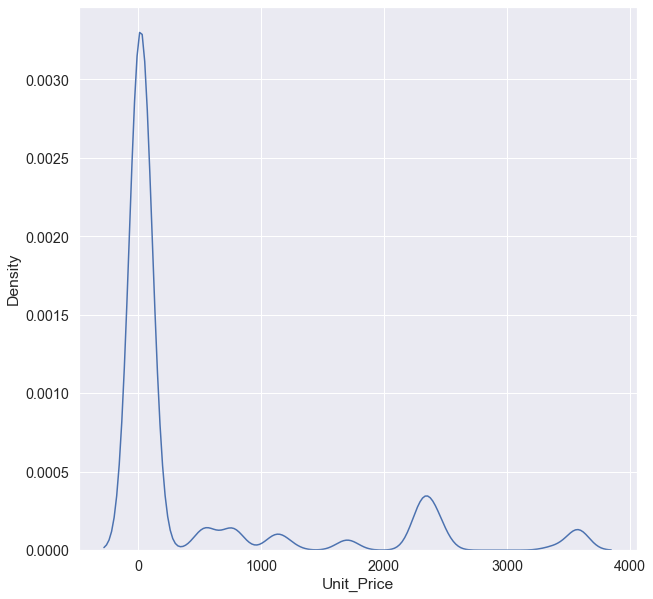

In [25]:
sns.kdeplot(data=df,x='Unit_Price')

In [12]:
def fix_Customer_Age(x):
    if x in ['?','x']:
        return np.nan
    else:
        return x

In [13]:
df['Customer_Age']=df['Customer_Age'].apply(fix_Customer_Age)

In [14]:
df['Customer_Age'].unique()

array([19., 49., 47., 35., 32., 34., 29., 51., 48., 43., 61., 57., 38.,
       52., 24., 23., 26., 54., 46., 41., 33., 42., 45., nan, 53., 21.,
       22., 67., 31., 37., 87., 25., 40., 44., 55., 50., 59., 17., 27.,
       28., 36., 56., 58., 30., 18., 62., 39., 64., 63., 20., 60., 84.,
       68., 65., 73., 69., 66., 75., 76., 78., 71., 72., 82., 86., 77.,
       74., 85., 81., 80., 70., 79.])

In [15]:
df['Customer_Age']=pd.to_numeric(df['Customer_Age'])

<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

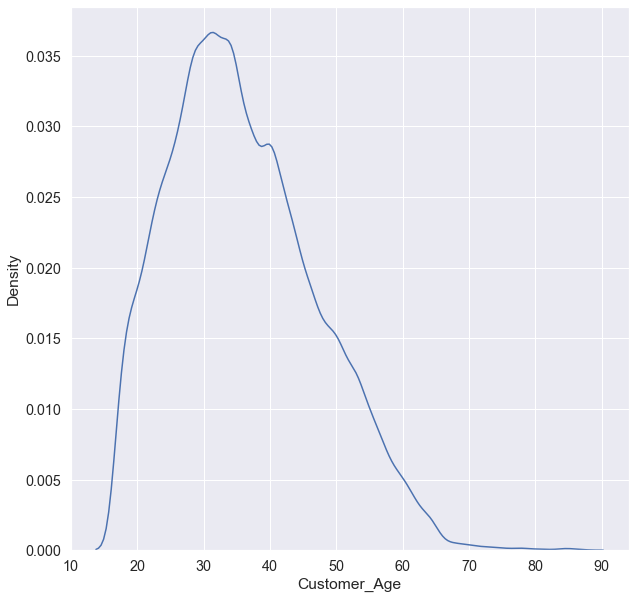

In [16]:
sns.kdeplot(data=df,x='Customer_Age')

In [31]:
df['Product'].unique().tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 nan,
 'x',
 '??',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Blue',
 '?',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-200 

In [32]:
def fix_Product(x):
    if x in ['?','x','??']:
        return np.nan
    else:
        return x

In [33]:
df['Product']=df['Product'].apply(fix_Product)

In [34]:
df['Product'].unique().tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 nan,
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Blue',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-200 Black, 42',
 'Mount

## Data cleaning

### Check null values

In [35]:
df.isnull().mean()*100

Date                0.000000
Customer_Age        0.005355
Age_Group           0.000000
Customer_Gender     0.000000
Country             0.000000
State               0.000000
Product_Category    0.000000
Sub_Category        3.891606
Product             7.656468
Order_Quantity      0.000000
Unit_Cost           0.000000
Unit_Price          0.000000
dtype: float64

In [36]:
df.dropna(axis=0,inplace=True)

In [37]:
df.reset_index(inplace =True , drop = True)

In [38]:
df.isnull().mean()*100

Date                0.0
Customer_Age        0.0
Age_Group           0.0
Customer_Gender     0.0
Country             0.0
State               0.0
Product_Category    0.0
Sub_Category        0.0
Product             0.0
Order_Quantity      0.0
Unit_Cost           0.0
Unit_Price          0.0
dtype: float64

In [39]:
df.describe()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price
count,103452.000000,103452.000000,103452.000000,103452.000000
mean,35.964409,11.625652,289.214544,489.695965
std,11.044038,9.586662,567.349783,951.492669
min,17.000000,1.000000,1.000000,2.000000
25%,28.000000,2.000000,2.000000,5.000000
50%,35.000000,10.000000,9.000000,25.000000
75%,43.000000,20.000000,59.000000,159.000000
max,87.000000,32.000000,2171.000000,3578.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103452 entries, 0 to 103451
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              103452 non-null  object 
 1   Customer_Age      103452 non-null  float64
 2   Age_Group         103452 non-null  object 
 3   Customer_Gender   103452 non-null  object 
 4   Country           103452 non-null  object 
 5   State             103452 non-null  object 
 6   Product_Category  103452 non-null  object 
 7   Sub_Category      103452 non-null  object 
 8   Product           103452 non-null  object 
 9   Order_Quantity    103452 non-null  int64  
 10  Unit_Cost         103452 non-null  int64  
 11  Unit_Price        103452 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 9.5+ MB


## Feature Engineering

In [41]:
df['Order Cost']=df['Unit_Cost']*df['Order_Quantity']

In [42]:
df['Date']=pd.to_datetime(df['Date'])

In [43]:
df['Year']=df['Date'].dt.year

In [44]:
df['Month_name']=df['Date'].dt.month_name()

In [45]:
df['Month']=df['Date'].dt.month

In [46]:
df['Day_name']=df['Date'].dt.day_name()

In [47]:
def season(x):
    if x in [12,1,2]:
        return 'Winter'
    elif x in [3,4,5]:
        return 'Spring'
    elif x in [6,7,8]:
        return 'Summer'
    else :
        return 'Autumn'

In [48]:
df['Season']=df['Month'].apply(season)

In [49]:
df['Profit']=(df['Order_Quantity']*df['Unit_Price'])-(df['Order_Quantity']*df['Unit_Cost']) 

In [50]:
df

,Date,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Order Cost,Year,Month_name,Month,Day_name,Season,Profit
0,2013-11-26,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,2013,November,11,Tuesday,Autumn,600
1,2015-11-26,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,360,2015,November,11,Thursday,Autumn,600
2,2014-03-23,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1035,2014,March,3,Sunday,Spring,1725
3,2016-03-23,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,900,2016,March,3,Wednesday,Spring,1500
4,2014-05-15,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,180,2014,May,5,Thursday,Spring,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103447,2016-04-12,41.0,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,72,2016,April,4,Tuesday,Spring,120
103448,2014-04-02,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,528,2014,April,4,Wednesday,Spring,880
103449,2016-04-02,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,528,2016,April,4,Saturday,Spring,880
103450,2014-03-04,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,576,2014,March,3,Tuesday,Spring,960


In [51]:
df.describe()

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Order Cost,Year,Month,Profit
count,103452.000000,103452.000000,103452.000000,103452.000000,103452.000000,103452.000000,103452.000000,103452.000000
mean,35.964409,11.625652,289.214544,489.695965,497.624183,2014.386102,6.454046,390.232833
std,11.044038,9.586662,567.349783,951.492669,917.600132,1.284443,3.478046,615.228371
min,17.000000,1.000000,1.000000,2.000000,1.000000,2011.000000,1.000000,1.000000
25%,28.000000,2.000000,2.000000,5.000000,26.000000,2013.000000,4.000000,42.000000
50%,35.000000,10.000000,9.000000,25.000000,104.000000,2014.000000,6.000000,150.000000
75%,43.000000,20.000000,59.000000,159.000000,487.000000,2016.000000,10.000000,448.000000
max,87.000000,32.000000,2171.000000,3578.000000,42978.000000,2016.000000,12.000000,26158.000000


<AxesSubplot:xlabel='Customer_Age', ylabel='Density'>

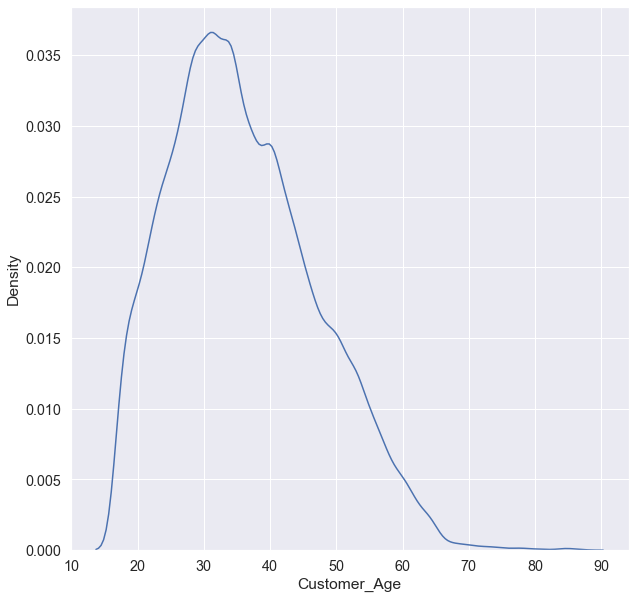

In [52]:
sns.kdeplot(data=df,x='Customer_Age')

In [53]:
df['Age_Group'].value_counts()

Adults (35-64)          51163
Young Adults (25-34)    35388
Youth (<25)             16224
Seniors (64+)             677
Name: Age_Group, dtype: int64

In [54]:
df['Customer_Gender'].value_counts()

M    53325
F    50127
Name: Customer_Gender, dtype: int64

In [55]:
df['Country'].value_counts()

United States     36299
Australia         22041
Canada            13071
United Kingdom    12059
Germany           10030
France             9952
Name: Country, dtype: int64

In [56]:
df['State'].value_counts()

California             20715
British Columbia       13015
England                12059
Washington             10516
New South Wales         9605
Victoria                5544
Oregon                  4882
Queensland              4794
Saarland                2506
Nordrhein-Westfalen     2258
Hessen                  2154
Seine (Paris)           2105
Hamburg                 1662
Nord                    1529
Seine Saint Denis       1528
South Australia         1429
Bayern                  1279
Hauts de Seine           982
Essonne                  901
Yveline                  847
Tasmania                 669
Seine et Marne           360
Moselle                  350
Loiret                   346
Val d'Oise               240
Garonne (Haute)          195
Brandenburg              171
Val de Marne             135
Somme                    125
Charente-Maritime        125
Loir et Cher             108
Pas de Calais             76
Alberta                   50
Texas                     28
Ohio          

In [57]:
df['Product_Category'].value_counts()

Accessories    65086
Bikes          25794
Clothing       12572
Name: Product_Category, dtype: int64

In [58]:
df['Sub_Category'].value_counts()

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Mountain Bikes        8803
Helmets               7932
Jerseys               6006
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1800
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             586
Bike Stands            455
Name: Sub_Category, dtype: int64

In [59]:
df['Product'].unique().tolist()

['Hitch Rack - 4-Bike',
 'All-Purpose Bike Stand',
 'Mountain Bottle Cage',
 'Water Bottle - 30 oz.',
 'Road Bottle Cage',
 'Bike Wash - Dissolver',
 'Fender Set - Mountain',
 'Half-Finger Gloves, L',
 'Half-Finger Gloves, M',
 'Half-Finger Gloves, S',
 'Sport-100 Helmet, Black',
 'Sport-100 Helmet, Blue',
 'Hydration Pack - 70 oz.',
 'Short-Sleeve Classic Jersey, XL',
 'Short-Sleeve Classic Jersey, L',
 'Short-Sleeve Classic Jersey, M',
 'Short-Sleeve Classic Jersey, S',
 'Long-Sleeve Logo Jersey, M',
 'Long-Sleeve Logo Jersey, XL',
 'Long-Sleeve Logo Jersey, L',
 'Long-Sleeve Logo Jersey, S',
 'Mountain-100 Silver, 38',
 'Mountain-100 Silver, 44',
 'Mountain-100 Black, 48',
 'Mountain-100 Silver, 48',
 'Mountain-100 Black, 38',
 'Mountain-200 Silver, 38',
 'Mountain-100 Black, 44',
 'Mountain-100 Silver, 42',
 'Mountain-200 Black, 46',
 'Mountain-200 Silver, 42',
 'Mountain-200 Silver, 46',
 'Mountain-200 Black, 38',
 'Mountain-100 Black, 42',
 'Mountain-200 Black, 42',
 'Mountain-40

<AxesSubplot:xlabel='Order_Quantity', ylabel='Density'>

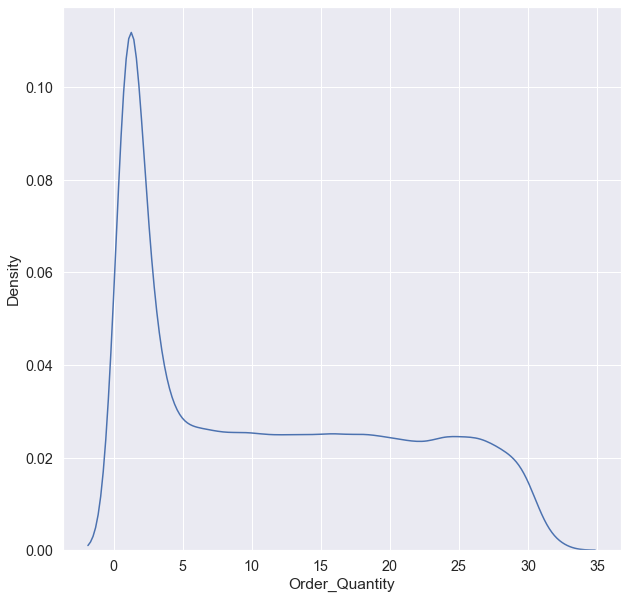

In [60]:
sns.kdeplot(data=df,x='Order_Quantity')

<AxesSubplot:xlabel='Unit_Cost', ylabel='Density'>

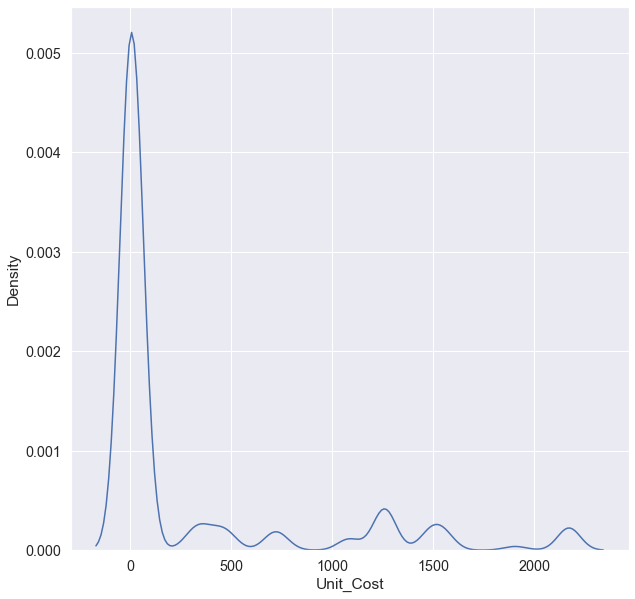

In [61]:
sns.kdeplot(data=df,x='Unit_Cost')

<AxesSubplot:xlabel='Unit_Price', ylabel='Density'>

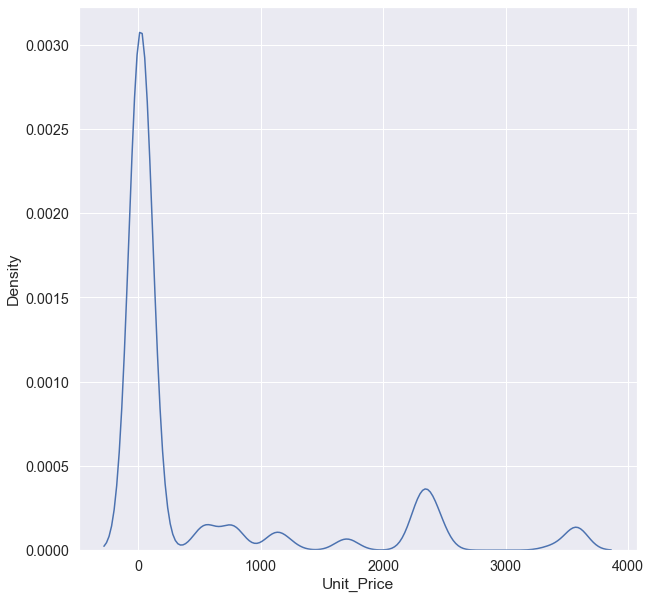

In [62]:
sns.kdeplot(data=df,x='Unit_Price')

<AxesSubplot:xlabel='Profit', ylabel='Density'>

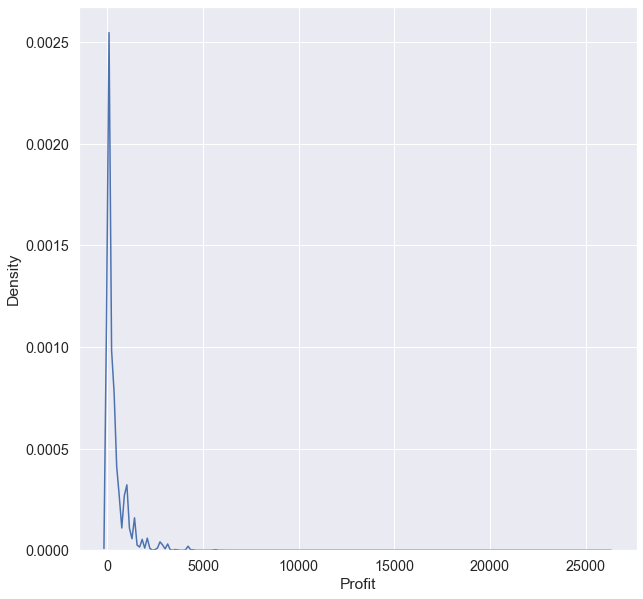

In [63]:
sns.kdeplot(data=df,x='Profit')

In [64]:
df['Year'].value_counts()

2016    26640
2014    26637
2015    22422
2013    22418
2011     2671
2012     2664
Name: Year, dtype: int64

In [65]:
df['Month_name'].value_counts()

June         10287
December     10232
May          10178
April         9339
March         8788
January       8532
February      8240
October       8048
November      7984
September     7496
August        7492
July          6836
Name: Month_name, dtype: int64

In [66]:
df['Season'].value_counts()

Spring    28305
Winter    27004
Summer    24615
Autumn    23528
Name: Season, dtype: int64

## Drop columns

In [67]:
df.drop('Date',axis=1,inplace=True)

In [68]:
df.drop('Product',axis=1,inplace=True)

## Detect outliers

<AxesSubplot:xlabel='Customer_Age'>

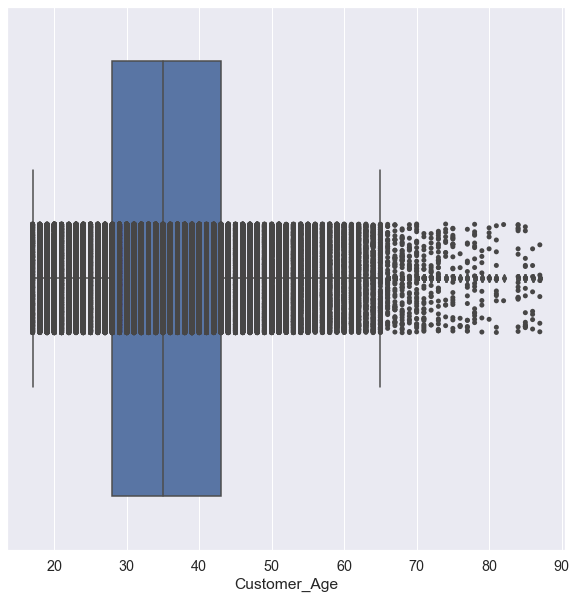

In [69]:
sns.boxplot(x='Customer_Age', data=df)
sns.stripplot(x='Customer_Age', data=df, color="#474646")

In [169]:
outliers_indices = detect_outliers(df, 0, ['Customer_Age'])
len(outliers_indices)

0

In [170]:
Customer_Age=df['Customer_Age'].median()
Customer_Age

35.0

In [171]:
df['Customer_Age'].iloc[outliers_indices]=Customer_Age

<AxesSubplot:xlabel='Customer_Age'>

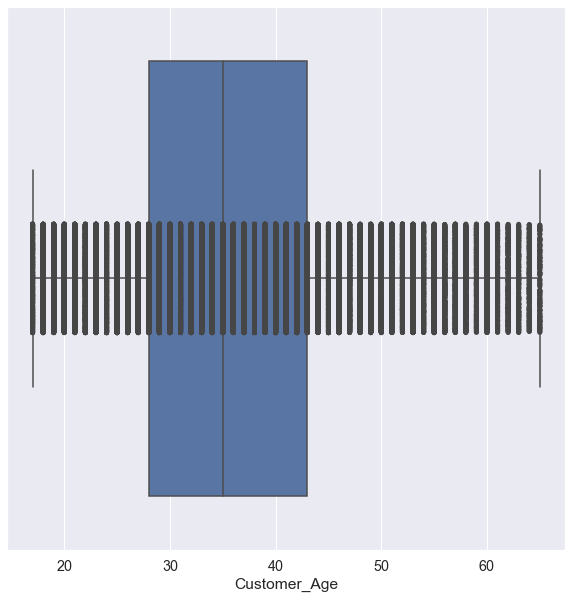

In [172]:
sns.boxplot(x='Customer_Age', data=df)
sns.stripplot(x='Customer_Age', data=df, color="#474646")

<AxesSubplot:xlabel='Order_Quantity'>

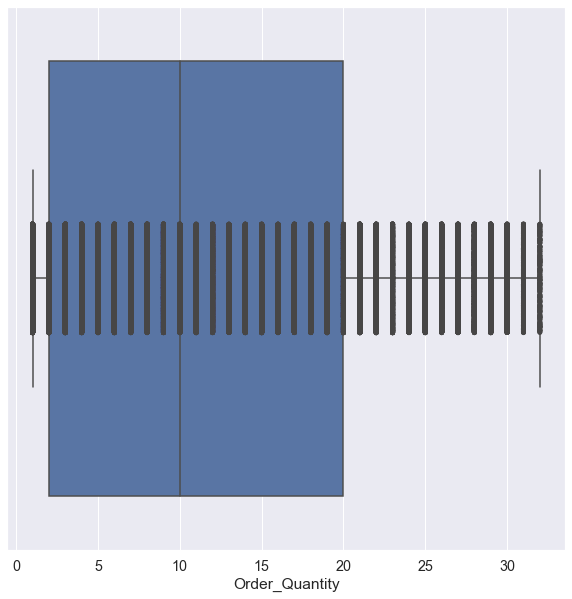

In [74]:
sns.boxplot(x='Order_Quantity', data=df)
sns.stripplot(x='Order_Quantity', data=df, color="#474646")

<AxesSubplot:xlabel='Profit'>

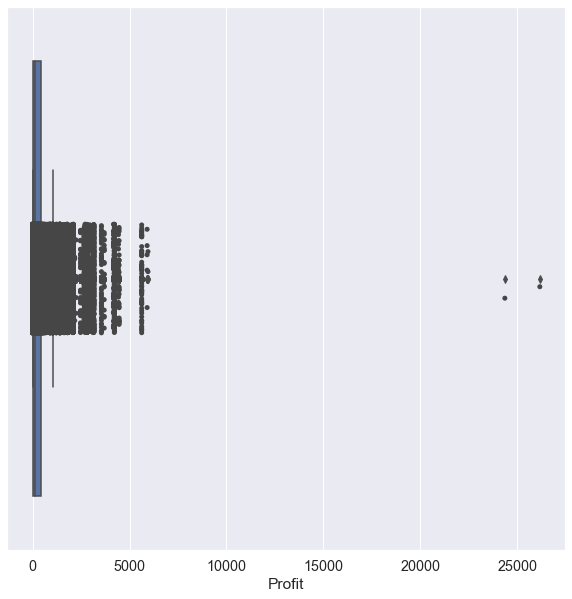

In [75]:
sns.boxplot(x='Profit', data=df)
sns.stripplot(x='Profit', data=df, color="#474646")

In [76]:
df[df['Profit']>20000]

,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Order Cost,Year,Month_name,Month,Day_name,Season,Profit
102488,52.0,Adults (35-64),M,Australia,Queensland,Clothing,Vests,27,1482,2384,40014,2013,July,7,Wednesday,Summer,24354
102489,52.0,Adults (35-64),M,Australia,Queensland,Clothing,Vests,29,1482,2384,42978,2015,July,7,Friday,Summer,26158


after checking for outlier i find that it important 

In [77]:
df

,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Order Cost,Year,Month_name,Month,Day_name,Season,Profit
0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,360,2013,November,11,Tuesday,Autumn,600
1,19.0,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,8,45,120,360,2015,November,11,Thursday,Autumn,600
2,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,23,45,120,1035,2014,March,3,Sunday,Spring,1725
3,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,20,45,120,900,2016,March,3,Wednesday,Spring,1500
4,47.0,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,4,45,120,180,2014,May,5,Thursday,Spring,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103447,41.0,Adults (35-64),M,United Kingdom,England,Clothing,Vests,3,24,64,72,2016,April,4,Tuesday,Spring,120
103448,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,22,24,64,528,2014,April,4,Wednesday,Spring,880
103449,18.0,Youth (<25),M,Australia,Queensland,Clothing,Vests,22,24,64,528,2016,April,4,Saturday,Spring,880
103450,37.0,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,24,24,64,576,2014,March,3,Tuesday,Spring,960


# Analyse the data

- How many Customer Gender for each country ?
- How many Customer Gender for each Age_Group ?
- How many Age_Group  for each country ?
- How many Customer Gender for each Product_Category ?
- How many Customer age by country?
- What is the total profit by country?
- What is the total profit by State ?
- What are the 5 top Sub_Category that has Profit?
- What are the 5 lowest Sub Category that has Profit?
- What is the average Profit of the Product_Category?
- What is the most Profit of the Customer_Gender?
- What is the most Profit of the Product_Category?
- is there a correlation between Order_Quantity, Unit_Cost, Unit_Price with the Profit of the Product?
- what are the 3 top month that has the most Profit ?
- what are the 3 lowest month that has the most Profit ?
- find the most profit by gender in the month
- what is the year that has the most Profit ?
- what is the Day that has the most Profit ?
- what is the month,year that has the most Profit ?
- what is the Season that has the most Profit ?
- what is the Country that has the most Profit ?
- find the profit by country and product category ?
- find the profit by country and Customer_Gender ?
- What are the customers buying according to their age ?
- What age groups are the biggest spenders, by country?
- What gender is the biggest spender, by country?

### How many Customer Gender for each country ?

In [78]:
df['dummy']=1

In [79]:
pd.pivot_table(data=df,index='Country',columns='Customer_Gender',values='dummy',aggfunc=len)

Customer_Gender,F,M
Country,,
Australia,10518,11523
Canada,6029,7042
France,5005,4947
Germany,5058,4972
United Kingdom,5961,6098
United States,17556,18743


<AxesSubplot:xlabel='Country', ylabel='count'>

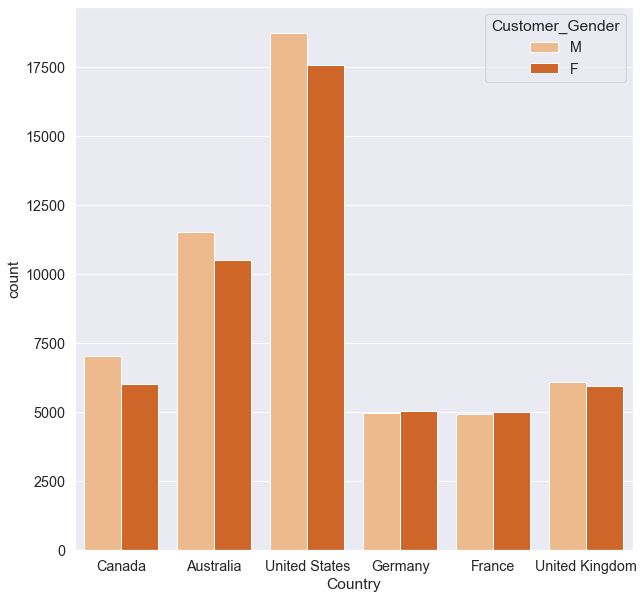

In [80]:
sns.countplot(data = df, x='Country', hue='Customer_Gender',palette=('Oranges'))

### How many Customer Gender for each Age_Group ?

In [81]:
##Adults between 35-64 buy more, followed by the young adults and youth.
pd.pivot_table(data=df,index='Age_Group',columns='Customer_Gender',values='dummy',aggfunc=len)

Customer_Gender,F,M
Age_Group,,
Adults (35-64),25253,25910
Seniors (64+),311,366
Young Adults (25-34),17162,18226
Youth (<25),7401,8823


<AxesSubplot:xlabel='Age_Group', ylabel='count'>

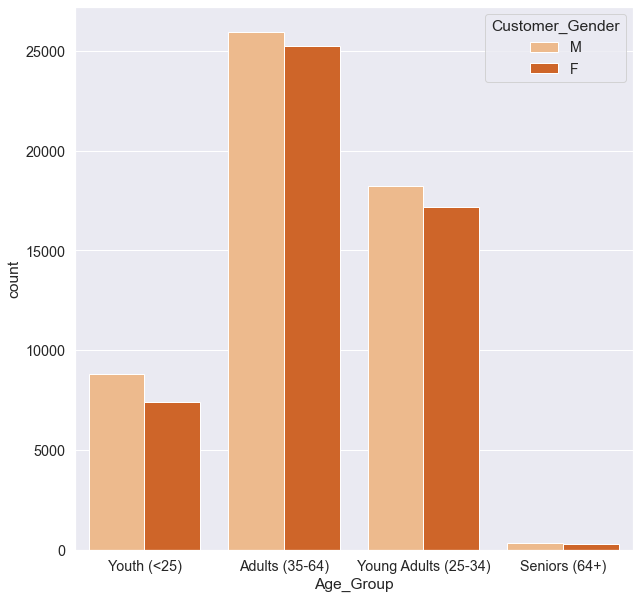

In [82]:
sns.countplot(data = df, x='Age_Group', hue='Customer_Gender',palette=('Oranges'))

### How many Customer Gender for each Product_Category ?

In [83]:
pd.pivot_table(data=df,index='Product_Category',columns='Customer_Gender',values='dummy',aggfunc=len)

Customer_Gender,F,M
Product_Category,,
Accessories,31512,33574
Bikes,12752,13042
Clothing,5863,6709


<AxesSubplot:xlabel='Product_Category', ylabel='count'>

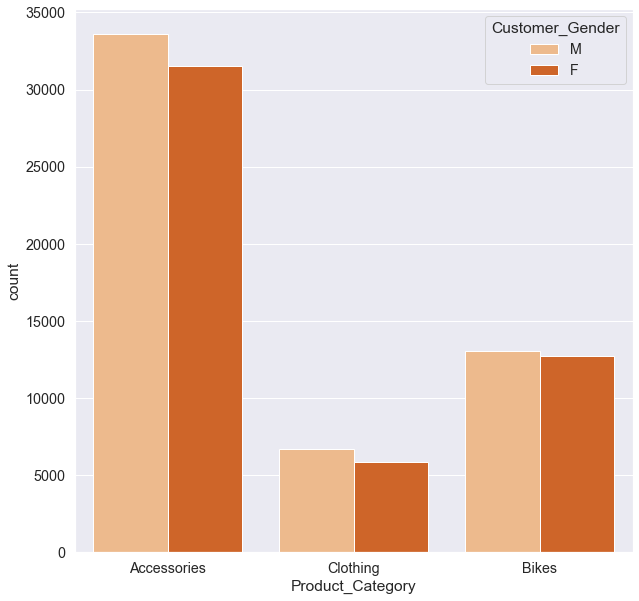

In [84]:
sns.countplot(data = df, x='Product_Category', hue='Customer_Gender',palette=('Oranges'))

## How many Customer age by country

In [85]:
pd.pivot_table(data=df,index='Country',columns='Age_Group',values='dummy',aggfunc=len)

Age_Group,Adults (35-64),Seniors (64+),Young Adults (25-34),Youth (<25)
Country,,,,
Australia,9671,56,8279,4035
Canada,6579,108,4271,2113
France,4335,65,4150,1402
Germany,4396,106,3989,1539
United Kingdom,5785,87,4321,1866
United States,20397,255,10378,5269


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'United Kingdom')])

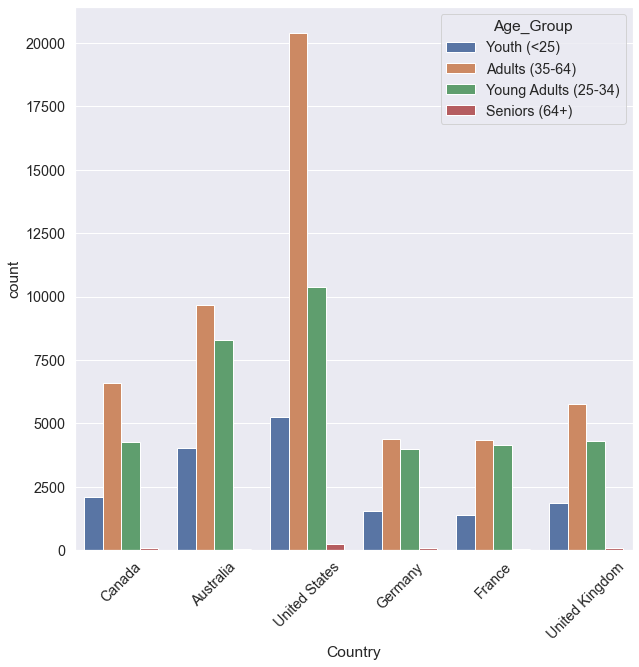

In [86]:
sns.countplot(data=df,x='Country',hue='Age_Group')
plt.xticks(rotation=45)

## What are the 10 Top State by profit ?

In [87]:
df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).head(10)

State
California          7811023
England             4542883
New South Wales     4363142
Washington          3772216
British Columbia    3585129
Victoria            2675042
Queensland          2501034
Oregon              1749427
Saarland            1042058
Hessen               931124
Name: Profit, dtype: int64

In [88]:
index_d=df.groupby(['State'])['Profit'].sum().sort_values(ascending=False).head(10).index

In [89]:
d=df[df['State'].isin(index_d)]

<AxesSubplot:xlabel='State', ylabel='Profit'>

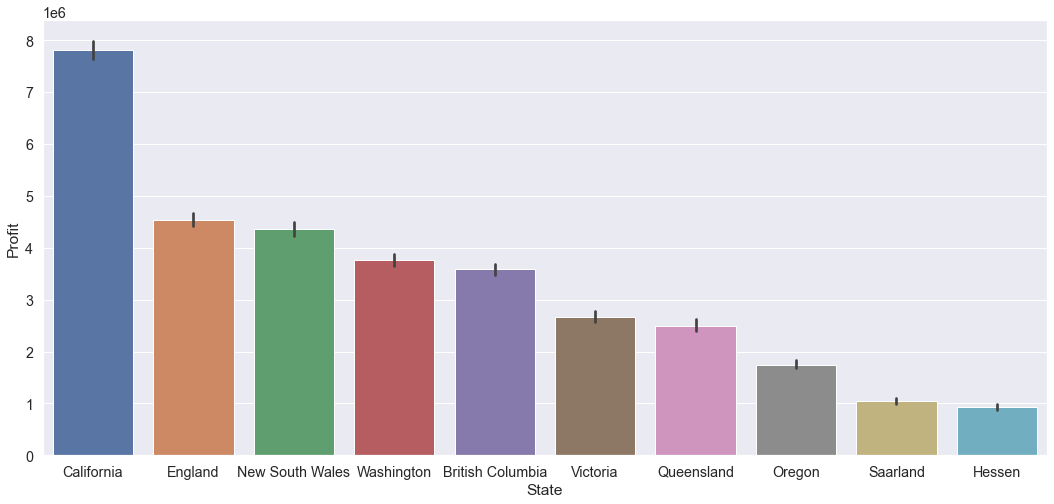

In [90]:
plt.figure(figsize=(18,8))
sns.barplot(data=d,x='State',y='Profit',estimator=np.sum,order=index_d)


##  What are the 10 lowest State by profit ?

In [91]:
df.groupby(['State'])['Profit'].sum().sort_values(ascending=True).head(10)

State
Virginia            72
Alabama            105
North Carolina     279
Missouri           407
Minnesota          428
Mississippi        552
South Carolina     716
Ontario            768
Montana            783
Massachusetts     2108
Name: Profit, dtype: int64

In [92]:
index_d=df.groupby(['State'])['Profit'].sum().sort_values(ascending=True).head(10).index

In [93]:
d=df[df['State'].isin(index_d)]

<AxesSubplot:xlabel='State', ylabel='Profit'>

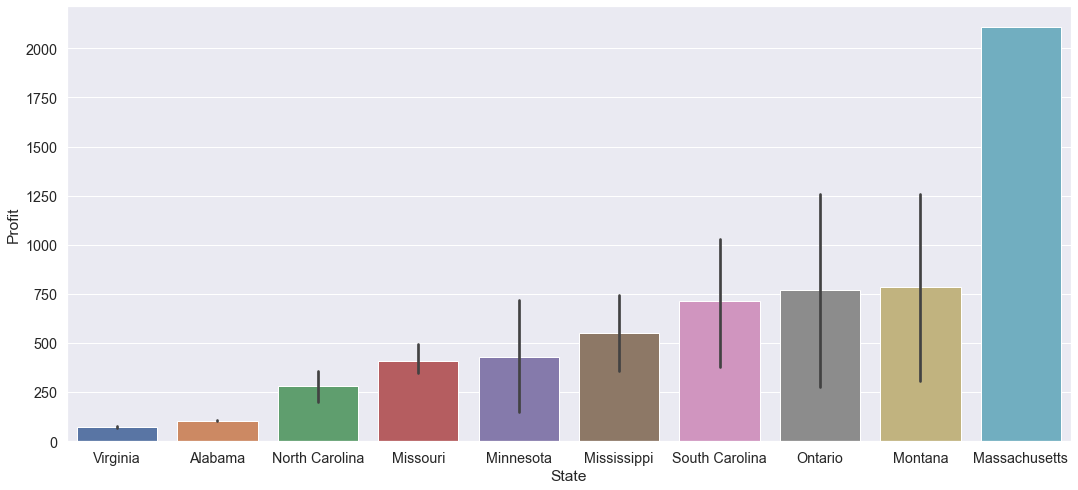

In [94]:
plt.figure(figsize=(18,8))
sns.barplot(data=d,x='State',y='Profit',estimator=np.sum,order=index_d)

### What is the total profit by country?

In [95]:
df.groupby(['Country'])['Profit'].sum().sort_values(ascending=False)

Country
United States     13390101
Australia         10546048
United Kingdom     4542883
Germany            4183841
France             4099287
Canada             3608207
Name: Profit, dtype: int64

In [96]:
index_d=df.groupby(['Country'])['Profit'].sum().sort_values(ascending=False).index

In [97]:
d=df[df['Country'].isin(index_d)]

<AxesSubplot:xlabel='Country', ylabel='Profit'>

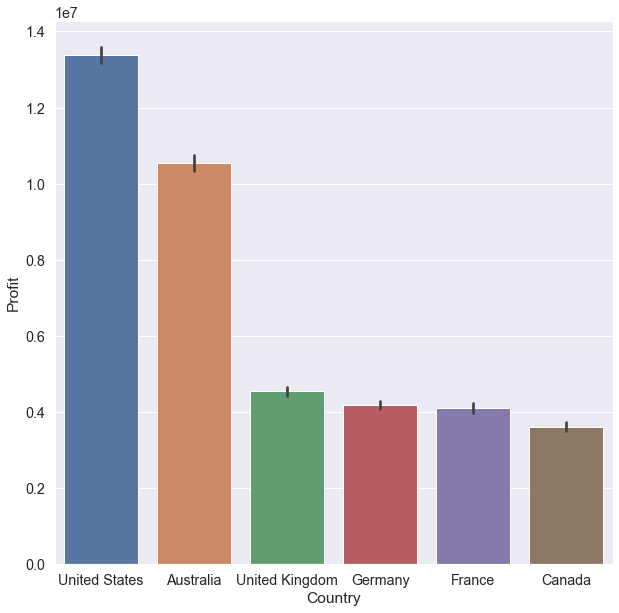

In [98]:
sns.barplot(data=d,x='Country',y='Profit',estimator=np.sum,order=index_d)

###  What are the 5 top Sub_Category that has Profit?

In [99]:
df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False).head(5)

Sub_Category
Road Bikes         14083736
Mountain Bikes     10669170
Tires and Tubes     3173102
Touring Bikes       3040263
Helmets             2593140
Name: Profit, dtype: int64

In [100]:
index_d=df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=False).head(5).index

In [101]:
Data=df[df['Sub_Category'].isin(index_d)]

<AxesSubplot:xlabel='Sub_Category', ylabel='Profit'>

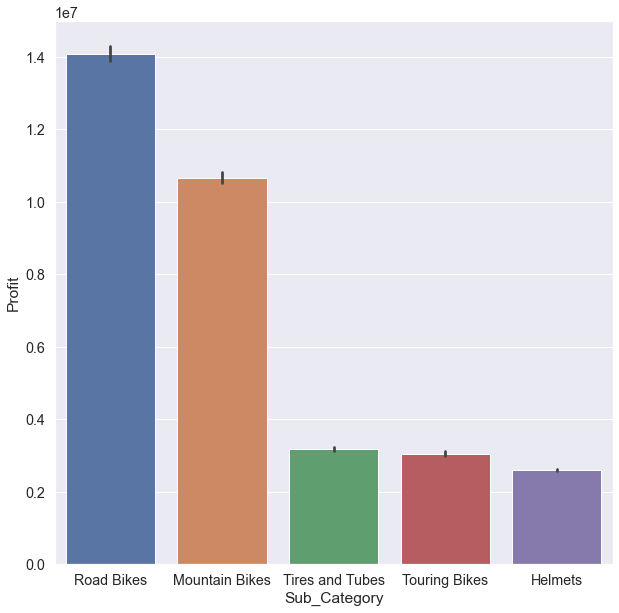

In [102]:
sns.barplot(data=Data,x='Sub_Category',y='Profit',estimator=np.sum,order=index_d)

## What are the 5 lowest Sub Category that has Profit?

In [103]:
df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=True).head(5)

Sub_Category
Socks          107664
Cleaners       137610
Bike Stands    240000
Bike Racks     352875
Gloves         599633
Name: Profit, dtype: int64

In [104]:
index_d=df.groupby('Sub_Category').sum()['Profit'].sort_values(ascending=True).head(5).index

In [105]:
Data=df[df['Sub_Category'].isin(index_d)]

<AxesSubplot:xlabel='Sub_Category', ylabel='Profit'>

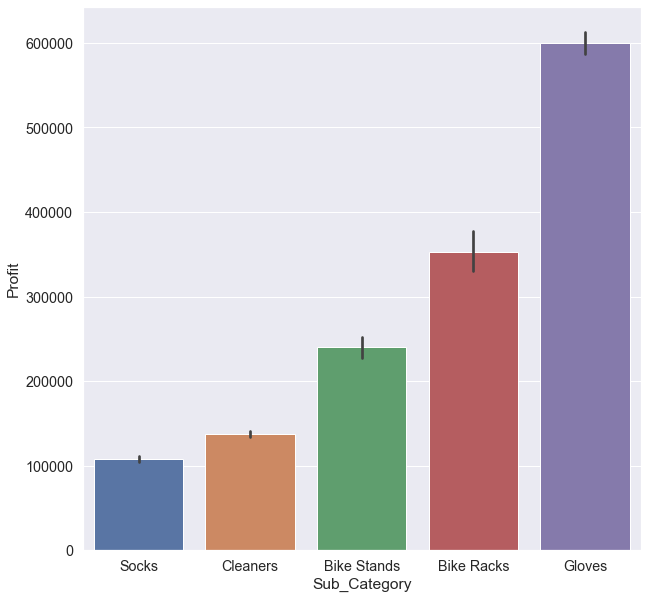

In [106]:
sns.barplot(data=Data,x='Sub_Category',y='Profit',estimator=np.sum,order=index_d)

### What is the average Profit of the Product_Category

In [107]:
df.groupby('Product_Category').mean()['Profit'].sort_values(ascending=False)

Product_Category
Bikes          1077.505195
Clothing        285.486876
Accessories     138.095090
Name: Profit, dtype: float64

In [108]:
index_d=df.groupby('Product_Category').mean()['Profit'].sort_values(ascending=False).index

In [109]:
Data=df[df['Product_Category'].isin(index_d)]

<AxesSubplot:xlabel='Product_Category', ylabel='Profit'>

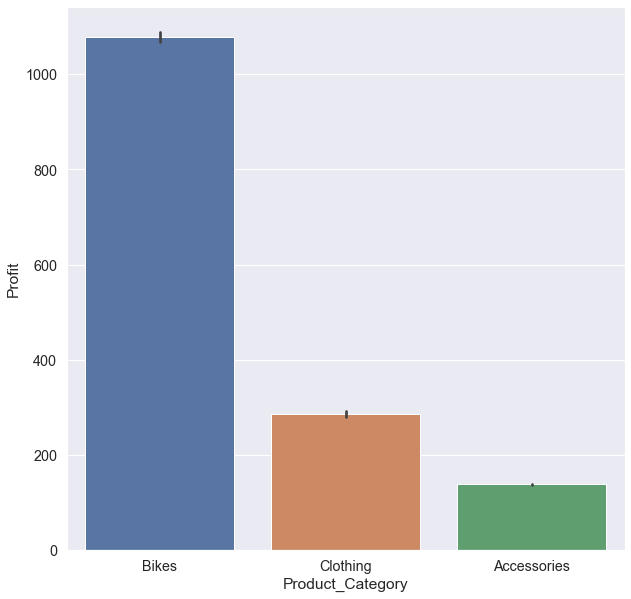

In [110]:
sns.barplot(data=Data,x='Product_Category',y='Profit',estimator=np.mean,order=index_d)

### What is the most Profit of the Customer_Gender?

In [111]:
df.groupby('Customer_Gender').sum()['Profit'].sort_values(ascending=False)

Customer_Gender
M    20540410
F    19829957
Name: Profit, dtype: int64

In [112]:
index_d=df.groupby('Customer_Gender').sum()['Profit'].sort_values(ascending=False).index

In [113]:
Data=df[df['Customer_Gender'].isin(index_d)]

<AxesSubplot:xlabel='Customer_Gender', ylabel='Profit'>

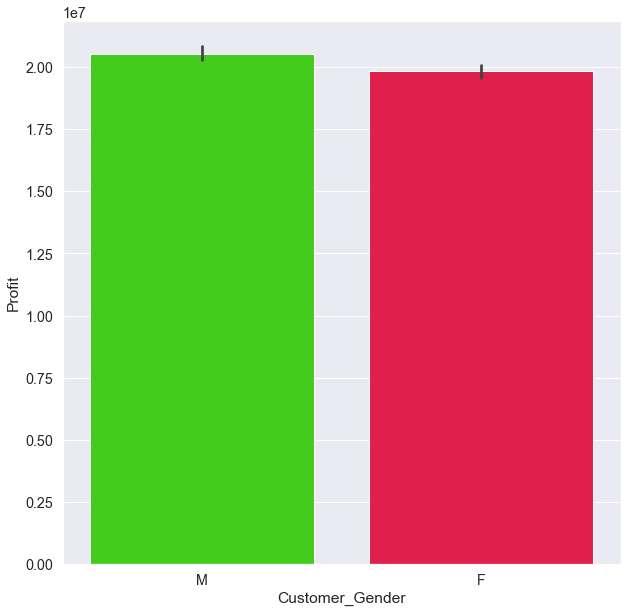

In [114]:
sns.barplot(data=Data,x='Customer_Gender',y='Profit',estimator=np.sum,order=index_d,palette='prism')

### What is the most Profit of the Product_Category?

In [115]:
df.groupby('Product_Category').sum()['Profit'].sort_values(ascending=False)

Product_Category
Bikes          27793169
Accessories     8988057
Clothing        3589141
Name: Profit, dtype: int64

In [116]:
index_d=df.groupby('Product_Category').sum()['Profit'].sort_values(ascending=False).index

In [117]:
Data=df[df['Product_Category'].isin(index_d)]

<AxesSubplot:xlabel='Product_Category', ylabel='Profit'>

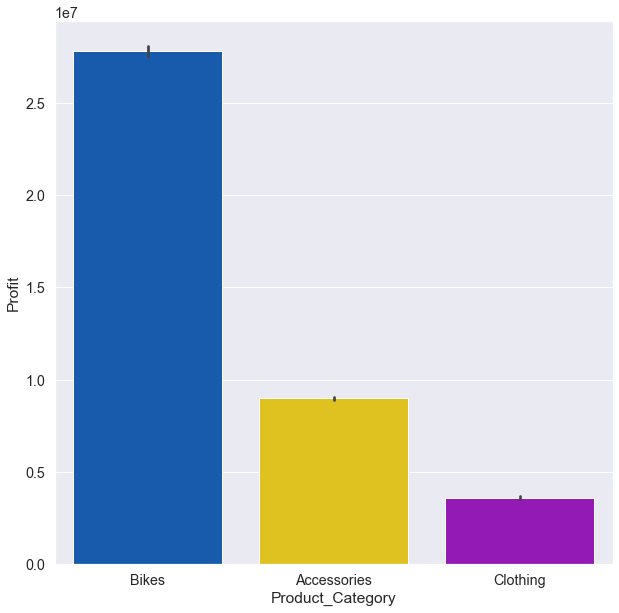

In [118]:
sns.barplot(data=Data,x='Product_Category',y='Profit',order=index_d,estimator=np.sum,palette='prism')

### is there a correlation between Order_Quantity, Unit_Cost, Unit_Price with the Profit of the Product


In [119]:
df.corr()['Profit']

Customer_Age     -0.004882
Order_Quantity   -0.283761
Unit_Cost         0.789380
Unit_Price        0.796304
Order Cost        0.963310
Year             -0.199904
Month            -0.003272
Profit            1.000000
dummy                  NaN
Name: Profit, dtype: float64

### what are the 3 top month that has the most Profit ?

In [120]:
df.groupby('Month_name').sum()['Profit'].sort_values(ascending=False).head(3)

Month_name
December    4299591
June        4255939
May         4173906
Name: Profit, dtype: int64

In [121]:
index_d=df.groupby('Month_name').sum()['Profit'].sort_values(ascending=False).head(3).index

In [122]:
Data=df[df['Month_name'].isin(index_d)]

<AxesSubplot:xlabel='Month_name', ylabel='Profit'>

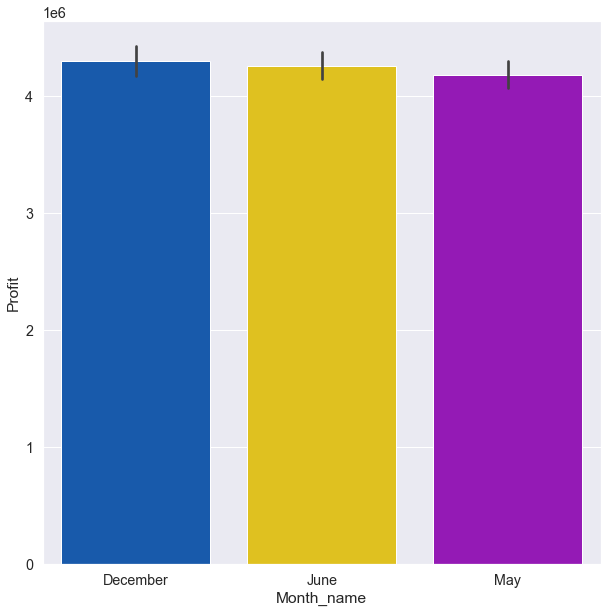

In [123]:
sns.barplot(data=Data,x='Month_name',y='Profit',estimator=np.sum,order=index_d,palette='prism')

## what are the 3 lowest month that has the most Profit ?

In [124]:
df.groupby('Month_name').sum()['Profit'].sort_values(ascending=True).head(3)

Month_name
July         2698018
August       2728196
September    2802705
Name: Profit, dtype: int64

In [125]:
index_d=df.groupby('Month_name').sum()['Profit'].sort_values(ascending=True).head(3).index

In [126]:
Data=df[df['Month_name'].isin(index_d)]

<AxesSubplot:xlabel='Month_name', ylabel='Profit'>

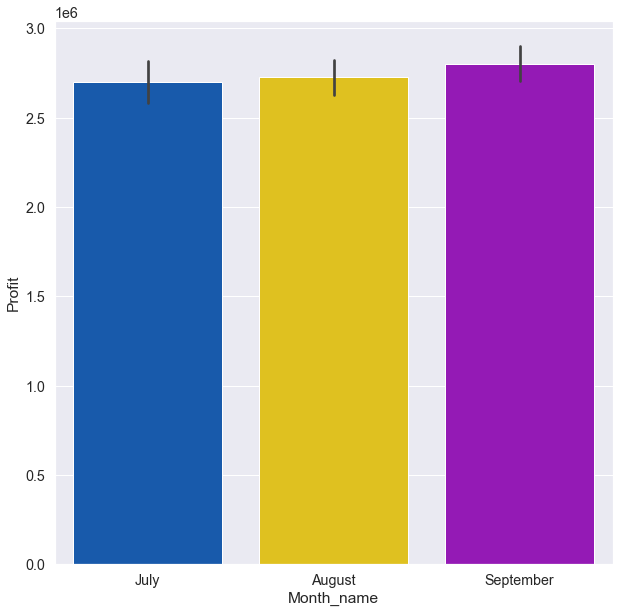

In [127]:
sns.barplot(data=Data,x='Month_name',y='Profit',estimator=np.sum,order=index_d,palette='prism')

### find the most profit by gender in the month

In [128]:
pd.pivot_table(data=df,index='Month_name',columns='Customer_Gender',values='Profit',aggfunc=np.sum)

Customer_Gender,F,M
Month_name,,
April,1718023,1875695
August,1363953,1364243
December,2176119,2123472
February,1492620,1707859
January,1658137,1651607
July,1279904,1418114
June,2091825,2164114
March,1563608,1899680
May,2029770,2144136


In [129]:
index_d=df.groupby('Month_name').sum()['Profit'].sort_values(ascending=False).index

In [130]:
Data=df[df['Month_name'].isin(index_d)]

<AxesSubplot:xlabel='Month_name', ylabel='Profit'>

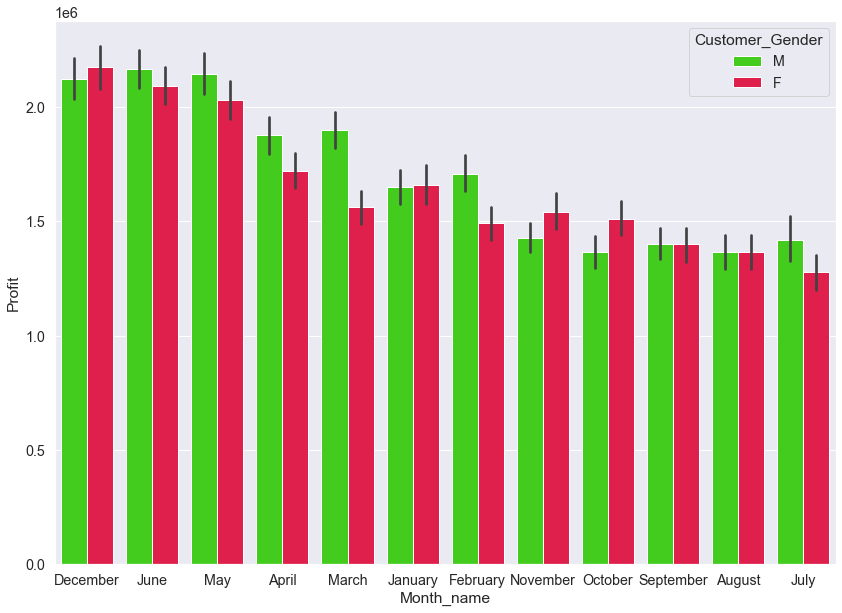

In [131]:
plt.figure(figsize=(14,10))
sns.barplot(data=Data,x='Month_name',y='Profit',hue='Customer_Gender',estimator=np.sum,order=index_d,palette='prism')

### what is the year that has the most Profit ?

In [132]:
df.groupby('Year').sum()['Profit'].sort_values(ascending=False)

Year
2015    9535940
2016    8540064
2013    7345552
2014    6924308
2012    4047960
2011    3976543
Name: Profit, dtype: int64

In [133]:
index_d=df.groupby('Year').sum()['Profit'].sort_values(ascending=False).index

In [134]:
Data=df[df['Year'].isin(index_d)]

<AxesSubplot:xlabel='Year', ylabel='Profit'>

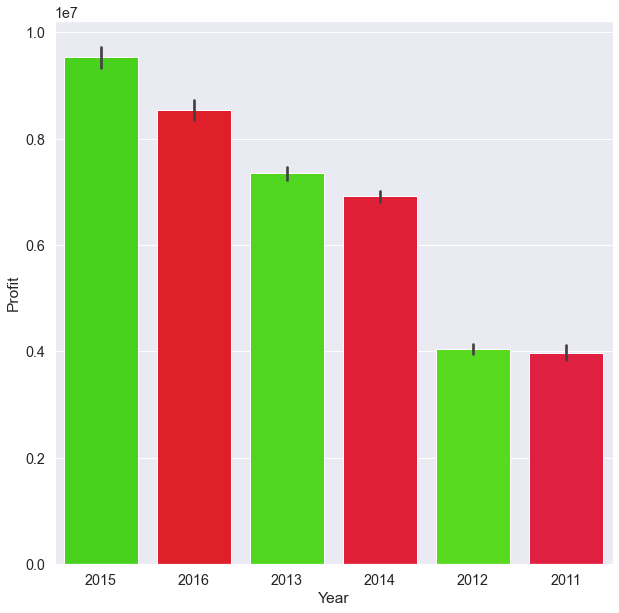

In [135]:
sns.barplot(data=Data,x='Year',y='Profit',estimator=np.sum,order=index_d,palette='prism')

<AxesSubplot:xlabel='Year', ylabel='Profit'>

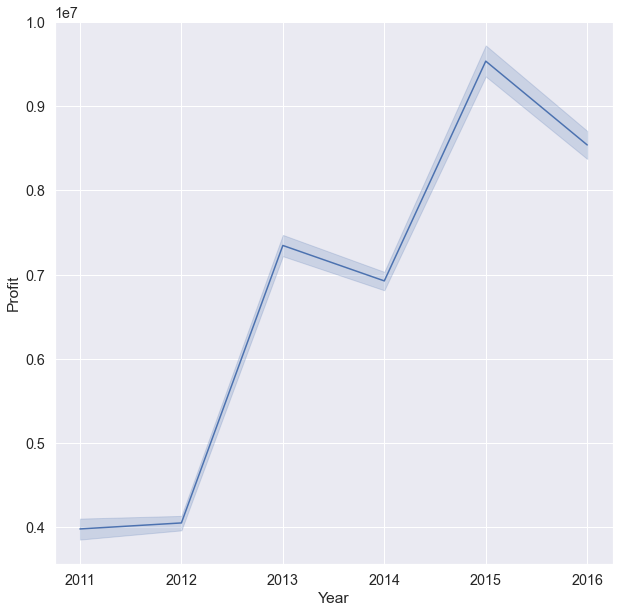

In [136]:
sns.lineplot(data=df,x='Year',y='Profit',estimator=sum)

## what is the most month by profit and gender in the  year 2015

In [137]:
df_2015=df[df['Year']==2015]

In [138]:
pd.pivot_table(data=df_2015,index='Month_name',columns='Customer_Gender',values='Profit',aggfunc=np.sum)

Customer_Gender,F,M
Month_name,,
April,163559,176907
August,509985,537115
December,918327,915123
February,160559,152523
January,147144,156140
July,390099,411301
June,197732,166647
March,148227,180242
May,199214,215096


In [139]:
index_d=df.groupby('Month_name').sum()['Profit'].sort_values(ascending=False).index

In [140]:
Data=df[df['Month_name'].isin(index_d)]

<AxesSubplot:xlabel='Month_name', ylabel='Profit'>

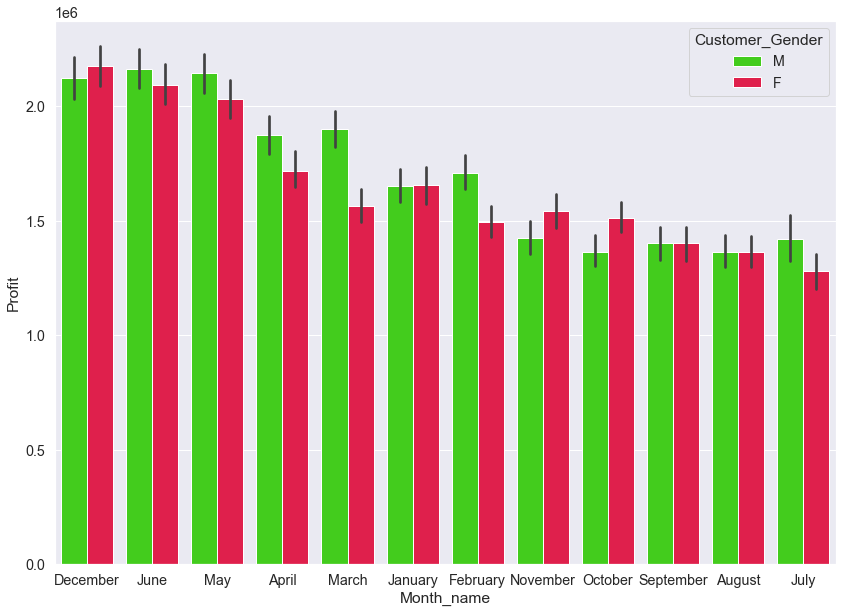

In [141]:
plt.figure(figsize=(14,10))
sns.barplot(data=Data,x='Month_name',y='Profit',hue='Customer_Gender',estimator=np.sum,order=index_d,palette='prism')

### what is the Day that has the most Profit ?

In [142]:
df.groupby('Day_name').sum()['Profit'].sort_values(ascending=False)

Day_name
Saturday     5972563
Sunday       5833449
Wednesday    5785797
Friday       5711519
Monday       5702849
Tuesday      5697883
Thursday     5666307
Name: Profit, dtype: int64

In [143]:
index_d=df.groupby('Day_name').sum()['Profit'].sort_values(ascending=False).index

In [144]:
Data=df[df['Day_name'].isin(index_d)]

<AxesSubplot:xlabel='Day_name', ylabel='Profit'>

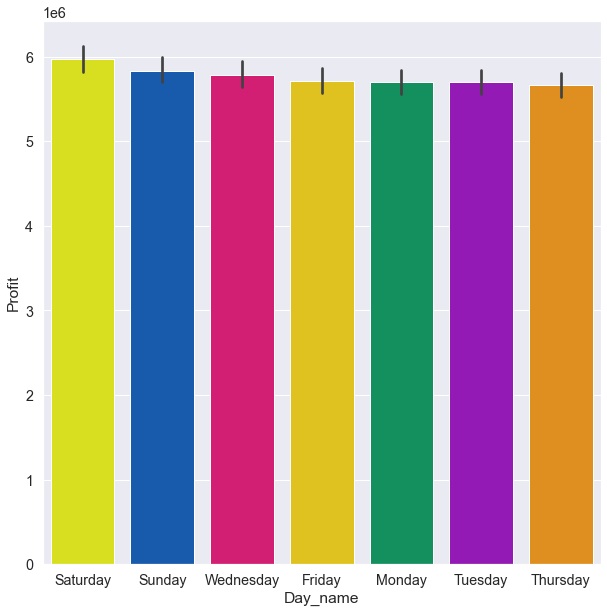

In [145]:
sns.barplot(data=Data,x='Day_name',y='Profit',estimator=np.sum,order=index_d,palette='prism')

<AxesSubplot:xlabel='Day_name', ylabel='Profit'>

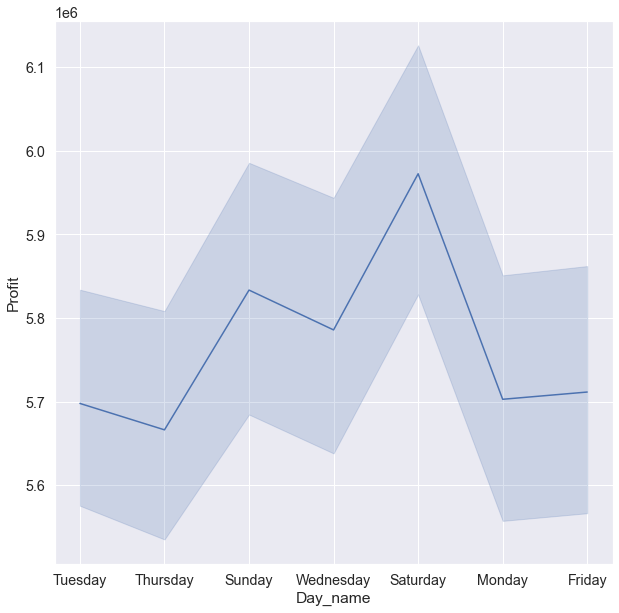

In [146]:
sns.lineplot(data=df,x='Day_name',y='Profit',estimator=np.sum)

### see profit performance by country, per year

In [147]:
pd.pivot_table(data=df,index='Year',columns='Country',values='Profit',aggfunc=sum)

Country,Australia,Canada,France,Germany,United Kingdom,United States
Year,,,,,,
2011,1189714,310369,438618,365349,338139,1334354
2012,1196956,325282,445522,363868,343708,1372624
2013,2049606,686977,708693,683752,800168,2416356
2014,1452433,702985,702514,818897,871267,2376212
2015,2830938,802514,915183,896305,1058677,3032323
2016,1826401,780080,888757,1055670,1130924,2858232


<AxesSubplot:xlabel='Country', ylabel='Profit'>

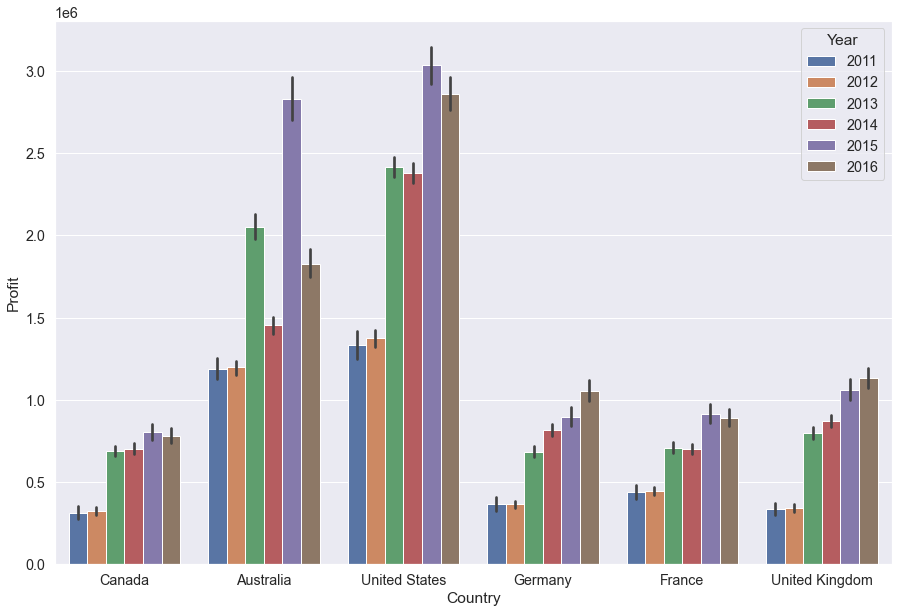

In [148]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Country',y='Profit',hue='Year',estimator=np.sum)

### what is the month,year that has the most Profit ?

In [149]:
pd.pivot_table(data=df,index='Year',columns='Month',values='Profit',aggfunc=sum)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,301712.0,268620.0,311005.0,309409.0,327269.0,285457.0,386422.0,391824.0,303111.0,319268.0,256567.0,515879.0
2012,298190.0,270250.0,322140.0,321874.0,338578.0,299006.0,378918.0,410778.0,306104.0,329144.0,266780.0,506198.0
2013,195316.0,224499.0,214327.0,221349.0,271584.0,247130.0,572275.0,878494.0,988922.0,1004055.0,1083537.0,1444064.0
2014,983906.0,949227.0,1029862.0,1074347.0,1256050.0,1346169.0,284747.0,NaN,NaN,NaN,NaN,NaN
2015,303284.0,313082.0,328469.0,340466.0,414310.0,364379.0,801400.0,1047100.0,1204568.0,1223919.0,1361513.0,1833450.0
2016,1227336.0,1174801.0,1257485.0,1326273.0,1566115.0,1713798.0,274256.0,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Year', ylabel='Profit'>

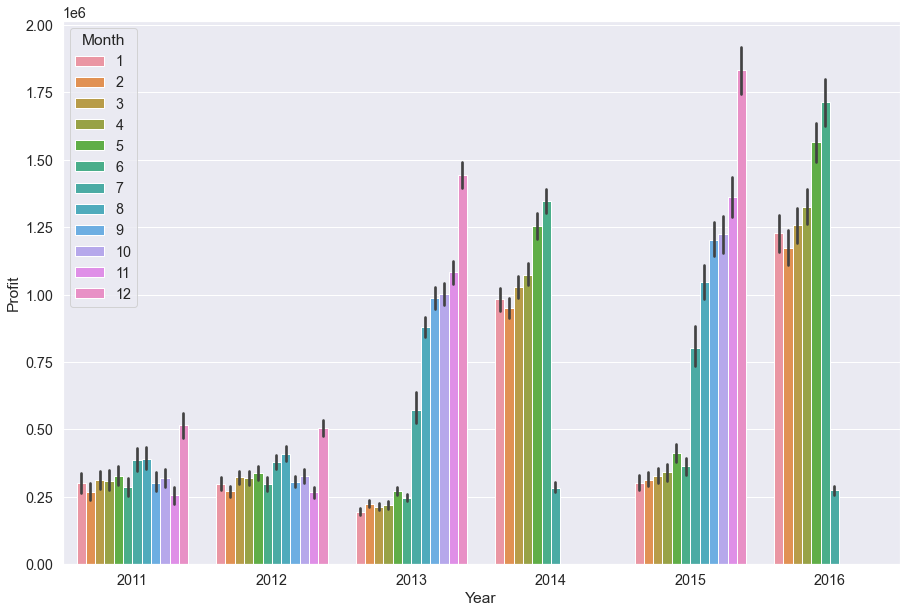

In [150]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Year',y='Profit',hue='Month',estimator=np.sum)

### what is the Season that has the most Profit ?

In [151]:
df.groupby('Season').sum()['Profit'].sort_values(ascending=False)

Season
Spring    11230912
Winter    10809814
Summer     9682153
Autumn     8647488
Name: Profit, dtype: int64

In [152]:
index_d=df.groupby('Season').sum()['Profit'].sort_values(ascending=False).index
index_d

Index(['Spring', 'Winter', 'Summer', 'Autumn'], dtype='object', name='Season')

In [153]:
Data=df[df['Season'].isin(index_d)]

<AxesSubplot:xlabel='Season', ylabel='Profit'>

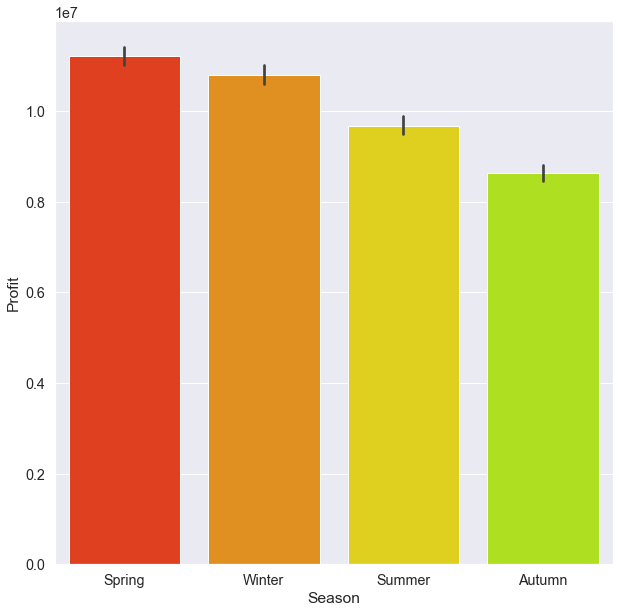

In [154]:
sns.barplot(data=Data,x='Season',y='Profit',estimator=np.sum,order=index_d,palette='prism')

In [155]:
x=df.groupby('Season').sum()


<AxesSubplot:xlabel='Season', ylabel='Profit'>

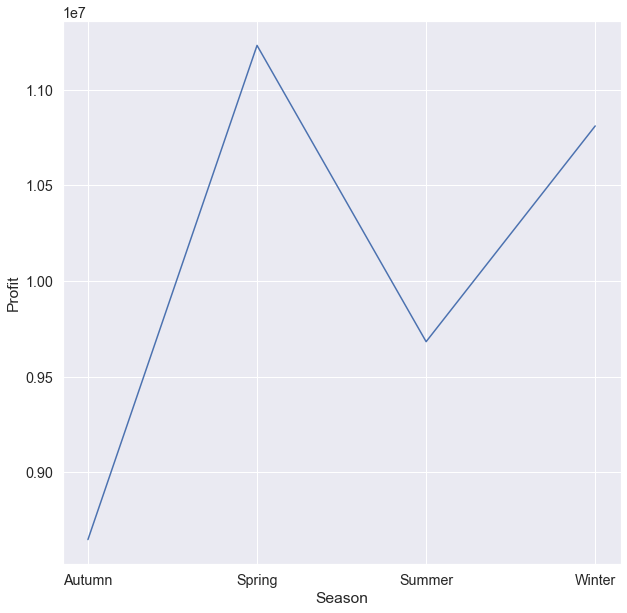

In [156]:
sns.lineplot(data=x,x='Season',y='Profit',estimator=np.sum)

### find the profit by country and product category ?

In [161]:
pd.pivot_table(data=df,index='Country',columns='Product_Category',values='Profit',aggfunc=sum)

Product_Category,Accessories,Bikes,Clothing
Country,,,
Australia,1767417,8076670,701961
Canada,1272477,1728880,606850
France,841414,2961453,296420
Germany,924176,3034347,225318
United Kingdom,954641,3275578,312664
United States,3227932,8716241,1445928


Text(0.5, 1.0, 'profit by country and product category')

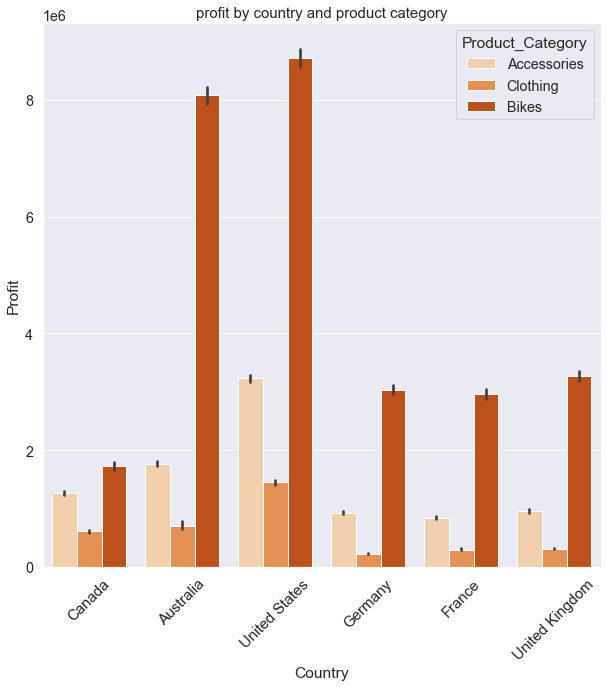

In [162]:
sns.barplot(data = df, x='Country',y='Profit', hue='Product_Category', palette=('Oranges'),estimator=np.sum)
plt.xticks(size = 15,rotation = 45)
plt.title('profit by country and product category',size = 15)

### What are the customers buying according to their age ?

In [163]:
pd.pivot_table(data=df,index='Age_Group',columns='Product_Category',values='Profit',aggfunc=sum)

Product_Category,Accessories,Bikes,Clothing
Age_Group,,,
Adults (35-64),4660812,13593488,1918160
Seniors (64+),79260,61277,22886
Young Adults (25-34),3004400,10317074,1133527
Youth (<25),1243585,3821330,514568


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Youth (<25)'),
  Text(1, 0, 'Adults (35-64)'),
  Text(2, 0, 'Young Adults (25-34)'),
  Text(3, 0, 'Seniors (64+)')])

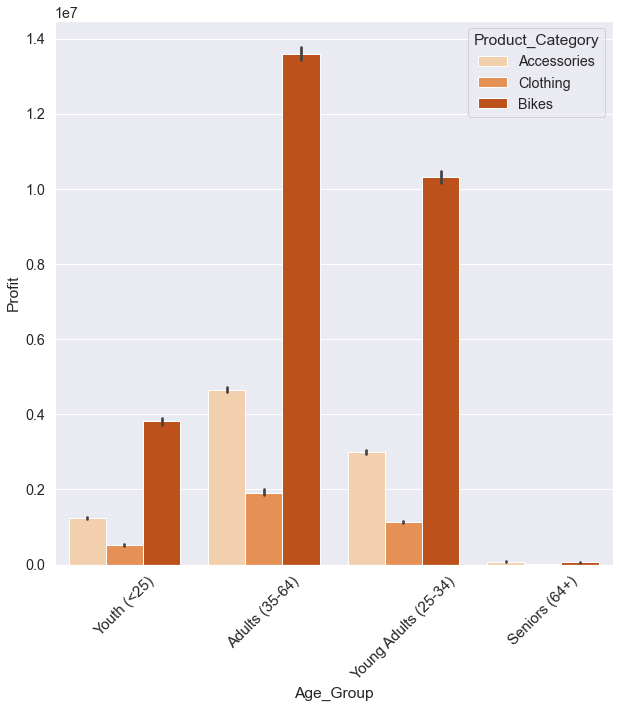

In [173]:
sns.barplot(data = df, x='Age_Group',y='Profit', hue='Product_Category', palette=('Oranges'),estimator=np.sum)
plt.xticks(size = 15,rotation = 45)

### What age groups are the biggest spenders, by country?

In [164]:
pd.pivot_table(data=df,index='Country',columns='Age_Group',values='Profit',aggfunc=sum)

Age_Group,Adults (35-64),Seniors (64+),Young Adults (25-34),Youth (<25)
Country,,,,
Australia,4620349,27259,3906200,1992240
Canada,2023882,22386,1124364,437575
France,1768228,8175,1838051,484833
Germany,1915937,19912,1701127,546865
United Kingdom,2211903,17792,1666890,646298
United States,7632161,67899,4218369,1471672


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Canada'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'United Kingdom')])

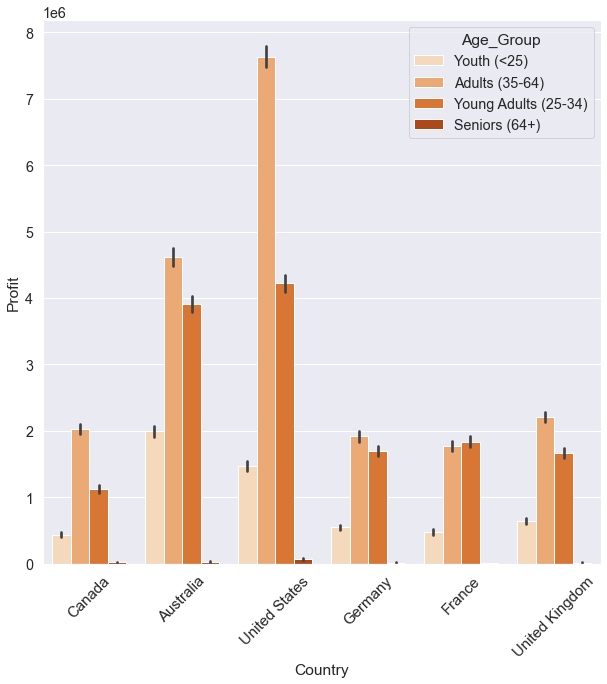

In [174]:
sns.barplot(data = df, x='Country',y='Profit', hue='Age_Group', palette=('Oranges'),estimator=np.sum)
plt.xticks(size = 15,rotation = 45)

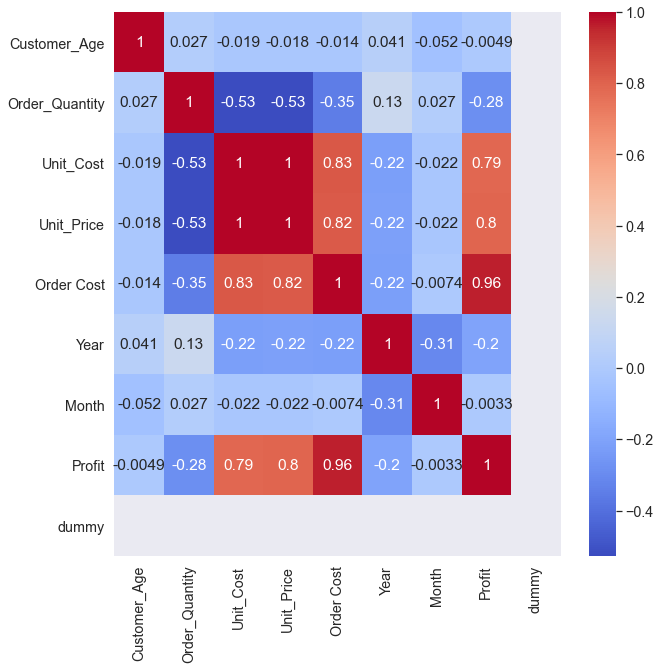

In [166]:
corr =df.corr()
cp = sns.heatmap(corr,cmap='coolwarm', annot=True)